note: to make this principled with all the other tissues, i did not do the 3 fold gene expression requirement from hpa in brain

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)

from scipy.stats import mannwhitneyu
import statsmodels.stats.multitest as smt


np.random.seed(31)

from matplotlib_venn import venn2

import mygene
mg = mygene.MyGeneInfo()

# 04032021_fig3c_donutPlots_allAD-PLASMAVOL_zeroCenterBatch_tmm.ipynb

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
figSavePath = "/Users/kayaneh/Documents/deconvolution/figures/fig3/"
figEnd = "_041102021.pdf"

In [3]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

# all your normalization functions

In [4]:
import os
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/projectcode/fig2/ad'

In [5]:
brainGiniPath_HEALTHY = "../../signatures_git/gini6_perCluster_brain_NORMAL_01212021.csv"
brainGiniPath_AD = "../../signatures_git/gini6_perCluster_brain_AZ_01212021.csv"

now get the average expression levels of the technical reps per biological rep

excellent, so we have a dataframe that's averaged for technical replicates. good stuff. now let's do the CIS.

In [6]:
giniH = pd.read_csv(brainGiniPath_HEALTHY, index_col = 0)
giniAD = pd.read_csv(brainGiniPath_AD, index_col = 0)

In [7]:
giniH

,Ast-gini,Ex-gini,In-gini,Mic-gini,Oli-gini,Opc-gini
ENSG00000103740,0.679430,NaN,NaN,NaN,NaN,NaN
ENSG00000171885,0.764535,NaN,NaN,NaN,NaN,NaN
ENSG00000129244,0.668107,NaN,NaN,NaN,NaN,NaN
ENSG00000164089,0.769483,NaN,NaN,NaN,NaN,NaN
ENSG00000168309,0.631545,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ENSG00000205927,NaN,NaN,NaN,NaN,NaN,0.725745
ENSG00000203805,NaN,NaN,NaN,NaN,NaN,0.658184
ENSG00000148123,NaN,NaN,NaN,NaN,NaN,0.726256
ENSG00000198732,NaN,NaN,NaN,NaN,NaN,0.613165


In [8]:
giniSigs = {}
for ct in giniH.columns.tolist():
    giniSigs[ct] = list(np.intersect1d(giniH[ct].dropna().index.tolist(),
                                       giniAD[ct].dropna().index.tolist()))

In [9]:
specificBrainSigs = giniSigs

whoa, it looks like they're all there!

# get intersection with their reported DEGs in the original paper

In [10]:
molecStethoDEG = pd.read_excel("/Users/kayaneh/Documents/deconvolution/alzheimers/abb1654_Data_file_S1.xlsx",
                              sheet_name = None)

In [11]:
upDEG = molecStethoDEG["Upregulated genes"].iloc[:,0].tolist() # we can subset off the ENSG
downDEG = molecStethoDEG["Downregulated genes"].iloc[:,0].tolist()


In [12]:
inDEGUp = {}
inDEGDown = {}
for sig in specificBrainSigs:
    inUp = np.intersect1d(specificBrainSigs[sig], upDEG).tolist()
    inDown = np.intersect1d(specificBrainSigs[sig], downDEG).tolist()
    inDEGUp[sig] = inUp
    inDEGDown[sig] = inDown

In [13]:
fullNames = {}
fullNames['Ast-gini-CIS'] = "Astrocyte"
fullNames["Ex-gini-CIS"] = "Excitatory Neuron"
fullNames["In-gini-CIS"] = "Inhibitory Neuron"
fullNames["Mic-gini-CIS"] = "Microglia"
fullNames["Oli-gini-CIS"] = "Oligodendrocyte"
fullNames["Opc-gini-CIS"] = "Oligodendrocyte Precursor Cell"

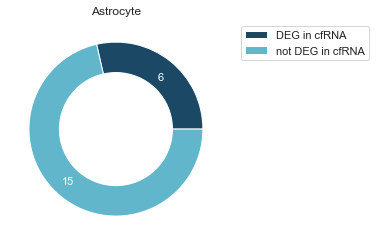

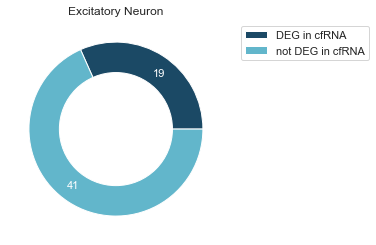

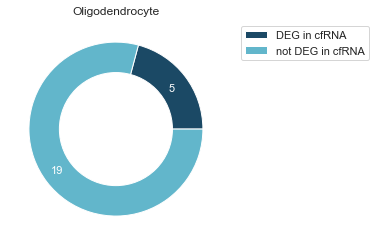

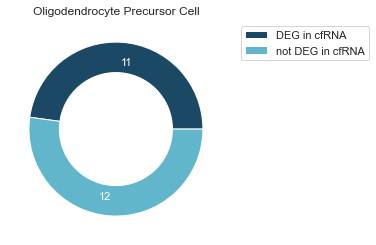

In [14]:
degDownCellProfiles = {}
for i in ['Ast-gini', 'Ex-gini', 'Oli-gini', 'Opc-gini']:
    cellTypeSpecificBrainGenes = specificBrainSigs[i]
    degDownThisCellType = inDEGDown[i]
    brainGenesInDown = np.intersect1d(cellTypeSpecificBrainGenes, degDownThisCellType)
    
    degDownCellProfiles[i] = brainGenesInDown
    shared = len(brainGenesInDown)
    notInCF = len(np.setdiff1d(cellTypeSpecificBrainGenes, degDownThisCellType))

    thisCellTypeName = fullNames[i + "-CIS"]
    
    
    names = 'DEG in cfRNA', 'not DEG in cfRNA'
    size = [shared, notInCF]
    my_circle=plt.Circle( (0,0), 0.65, color='white')

    plt.pie(size, colors=['#1B4965','#62B6CB'], 
            labels = [shared, notInCF],
           labeldistance = .77,
           textprops={'color':"w"})

    
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(thisCellTypeName)
    plt.legend(names, bbox_to_anchor=(1.05, 1))
    plt.show()

In [15]:
clear all